## Implementing Vanilla Neural Networks using PyTorch

### 0. Importing Libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import sys
sys.path.append('../')

from nn_pytorch import NeuralNet

ModuleNotFoundError: No module named 'torch'

### 1. Reading the Data

In [6]:
def read_data(filename):
    with open(filename, 'rb') as f:
        f.read(8)
        if 'image' in filename:
            f.read(8)
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8)

In [13]:
train_files = {
    'images': 'data/train_images',
    'labels': 'data/train_labels'
}
test_files = {
    'images': 'data/test_images',
    'labels': 'data/test_labels'
}

train_sz = 60000
test_sz = 10000

X_train = read_data(train_files['images']).reshape(train_sz, -1)
y_train = read_data(train_files['labels'])

X_test = read_data(test_files['images']).reshape(test_sz, -1)
y_test = read_data(test_files['labels'])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


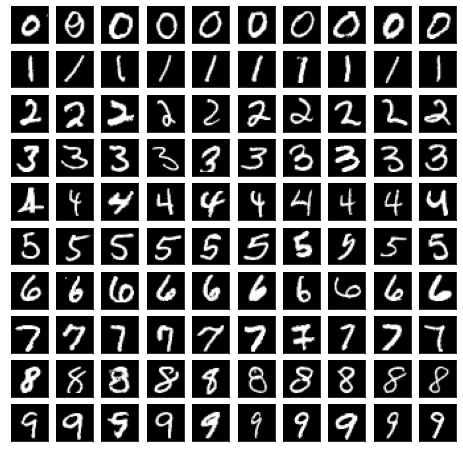

In [44]:
# Plot sample data

num_classes = 10
sample_sz = 10
w, h = 28, 28

fig, ax = plt.subplots(num_classes, sample_sz, figsize=(8, 8))

for i in range(num_classes):
    target, = (y_train==i).nonzero()
    sample = X_train[np.random.choice(target, sample_sz)]
    for j in range(sample_sz):
        ax[i][j].imshow(sample[j].reshape(w, h), cmap='gray')

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()